In [ ]:
import pandas as pd
import numpy as np
# matplotlib - bar,line,pie,scatter,histogram
import matplotlib.pyplot as plt
# seaborn - descriptive plots like : boxplot, kde, heatmap
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
falcon_df = pd.read_csv("/content/Falcon 9 and Falcon Heavy launches .csv")

In [ ]:
falcon_df.head()

,Unnamed: 0,Flight No,Date,Time,"Version, Booster",Launch_Site,Payload,Payload_Mass,Orbit,Customer,Launch_Outcome,Booster_landing
0,0,1,4 June 2010,18:45,F9 v1.0 B0003,CCAFS SLC-40,Dragon Spacecraft Qualification Unit,No payload (excl. Dragon Mass),LEO,SpaceX,Success,Failure
1,1,2,8 December 2010,15:43,F9 v1.0 B0004,CCAFS SLC-40,Dragon demo flight C1,Classified (excl. Dragon Mass),LEO (ISS),NASA (COTS) NRO,Success,Failure
2,2,3,22 May 2012,07:44,F9 v1.0 B0005,CCAFS SLC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt
3,3,4,8 October 2012,00:35,F9 v1.0 B0006,CCAFS SLC-40,SpaceX CRS-1,"4,700",LEO (ISS),NASA (CRS),Success,No attempt
4,4,4,8 October 2012,00:35,F9 v1.0 B0006,CCAFS SLC-40,Orbcomm-OG2,172,LEO,Orbcomm,Partial failure,No attempt


In [ ]:
falcon_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
falcon_df['Year'] = falcon_df['Date'].str[-4:]   # slicing year from date column

In [ ]:
falcon_df['Date'] = pd.to_datetime(falcon_df['Date'])   # typecasting date column into datetime format

In [ ]:
falcon_df.head()

,Flight No,Date,Time,"Version, Booster",Launch_Site,Payload,Payload_Mass,Orbit,Customer,Launch_Outcome,Booster_landing,Year
0,1,2010-06-04,18:45,F9 v1.0 B0003,CCAFS SLC-40,Dragon Spacecraft Qualification Unit,No payload (excl. Dragon Mass),LEO,SpaceX,Success,Failure,2010
1,2,2010-12-08,15:43,F9 v1.0 B0004,CCAFS SLC-40,Dragon demo flight C1,Classified (excl. Dragon Mass),LEO (ISS),NASA (COTS) NRO,Success,Failure,2010
2,3,2012-05-22,07:44,F9 v1.0 B0005,CCAFS SLC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt,2012
3,4,2012-10-08,00:35,F9 v1.0 B0006,CCAFS SLC-40,SpaceX CRS-1,"4,700",LEO (ISS),NASA (CRS),Success,No attempt,2012
4,4,2012-10-08,00:35,F9 v1.0 B0006,CCAFS SLC-40,Orbcomm-OG2,172,LEO,Orbcomm,Partial failure,No attempt,2012


##### Line Plot
    * Univariate or Bivariate Plots (Relationship Plot)
    * Trend Analysis (Time Series) - Univariate Analysis.

In [ ]:
falcon_df['Year'].value_counts().sort_values('index')

2010     2
2012     3
2013     3
2014     6
2015     7
2016     8
2019    11
2017    18
2018    20
2020    26
2022    30
2021    31
Name: Year, dtype: int64

<Axes: >

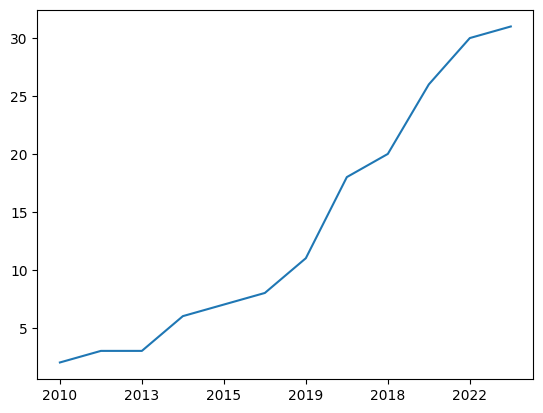

In [ ]:
# using plot() - using Pandas Dataframe
falcon_df['Year'].value_counts().sort_values('index').plot()

In [ ]:
satellite_data = falcon_df['Year'].value_counts().sort_values('index')
satellite_data

2010     2
2012     3
2013     3
2014     6
2015     7
2016     8
2019    11
2017    18
2018    20
2020    26
2022    30
2021    31
Name: Year, dtype: int64

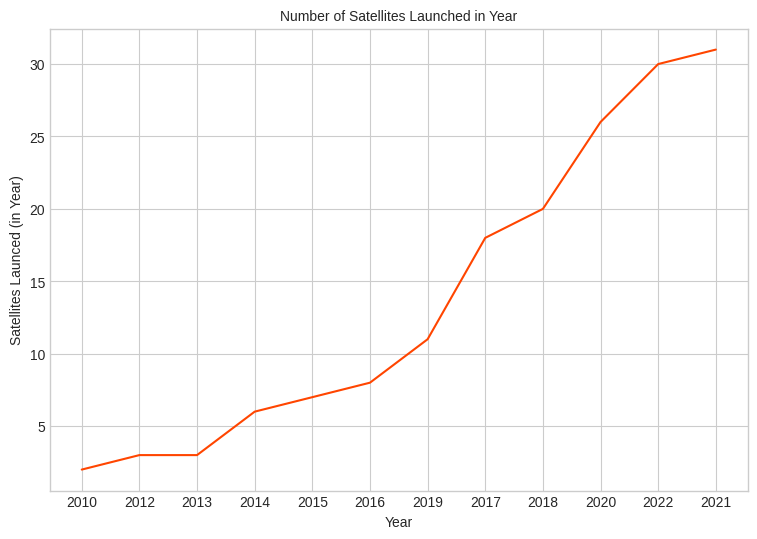

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (9,6))
plt.plot(satellite_data.index, satellite_data.values, color = 'orangered')
plt.xlabel('Year')
plt.ylabel('Satellites Launced (in Year)')
plt.title('Number of Satellites Launched in Year',fontsize = 10)
plt.show()

##### Bar Plot
    * Bivariate / Univariate Analysis
    * Bar Chart used by Categorical, Nominal Data.
    * Bar Charts are used to display counts (.value_counts()) of unique values for categorical dtype, Height of Bar represents count of each category.

In [ ]:
result_site = falcon_df['Launch_Site'].value_counts()
result_site

KSC LC-39A               48
CCAFS SLC-40             40
CCSFS SLC-40             31
Cape Canaveral LC-40     19
VAFB SLC-4E              16
VSFB SLC-4E               8
Cape Canaveral SLC-40     1
CCAF LC-40                1
VSFBSLC-4E                1
Name: Launch_Site, dtype: int64

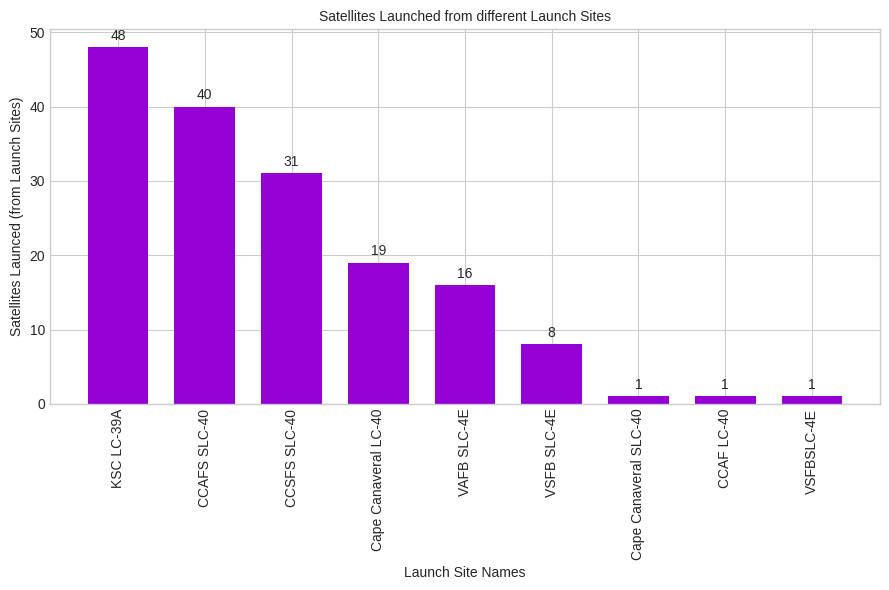

In [ ]:
plt.figure(figsize = (9,6))
bars = plt.bar(result_site.index, result_site.values, color = 'darkviolet', width = 0.7)
plt.xlabel('Launch Site Names')
plt.ylabel('Satellites Launced (from Launch Sites)')
plt.title('Satellites Launched from different Launch Sites',fontsize = 10)
plt.xticks(rotation = 90)

# Add labels on Bar Graph
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height), xy = (bar.get_x() + bar.get_width() / 2, height), xytext = (0, 3),
                 ha = 'center', va = 'bottom', textcoords = "offset points")
plt.tight_layout()
plt.show()

##### Histogram
    * Continious Data - Study the spread / distribution of continious data
    * Univariate Analysis.

In [ ]:
falcon_df['Payload_Mass'] = falcon_df['Payload_Mass'].replace('No payload (excl. Dragon Mass)', 0)
falcon_df['Payload_Mass'] = falcon_df['Payload_Mass'].str.replace(',',"")
falcon_df['Payload_Mass'] = falcon_df['Payload_Mass'].str.replace('\xa0', '')
falcon_df['Payload_Mass'] = falcon_df['Payload_Mass'].replace('Classified (excl. Dragon Mass)', np.nan)
falcon_df['Payload_Mass'] = falcon_df['Payload_Mass'].replace('5000–6000', '5500')
falcon_df['Payload_Mass'] = falcon_df['Payload_Mass'].replace('Unknown[d]', np.nan)
falcon_df['Payload_Mass'] = falcon_df['Payload_Mass'].replace('Unknown', np.nan)
falcon_df['Payload_Mass'] = falcon_df['Payload_Mass'].replace('Classified', np.nan)

In [ ]:
falcon_df['Payload_Mass'] = falcon_df['Payload_Mass'].astype('float32')

In [ ]:
falcon_df.replace(np.nan, np.round(falcon_df['Payload_Mass'].mean()), inplace = True)

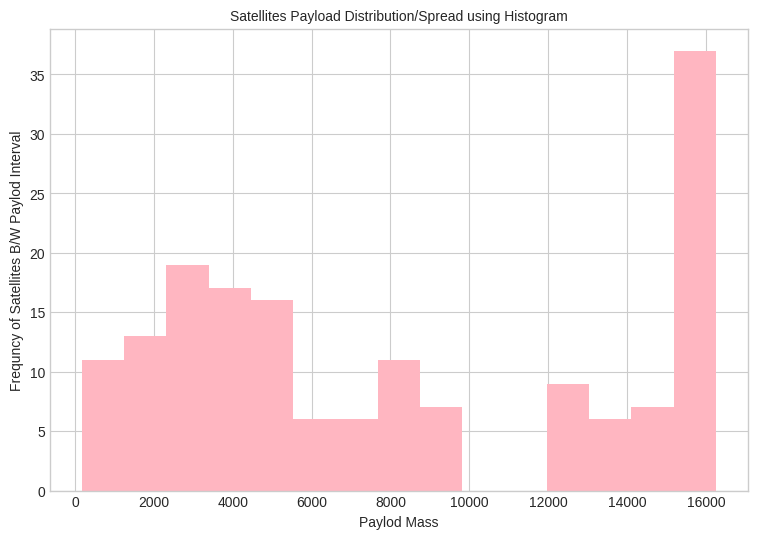

In [ ]:
plt.figure(figsize = (9,6))
plt.hist(falcon_df['Payload_Mass'], bins = 15, color = 'lightpink')
plt.xlabel('Paylod Mass')
plt.ylabel('Frequncy of Satellites B/W Paylod Interval')
plt.title('Satellites Payload Distribution/Spread using Histogram',fontsize = 10)
plt.show()

##### Scatter Plot
    * Scatter Plots is plotted between numerical values.
    * It shows relationship plot between x & y plots
    * Bivariate Analysis.

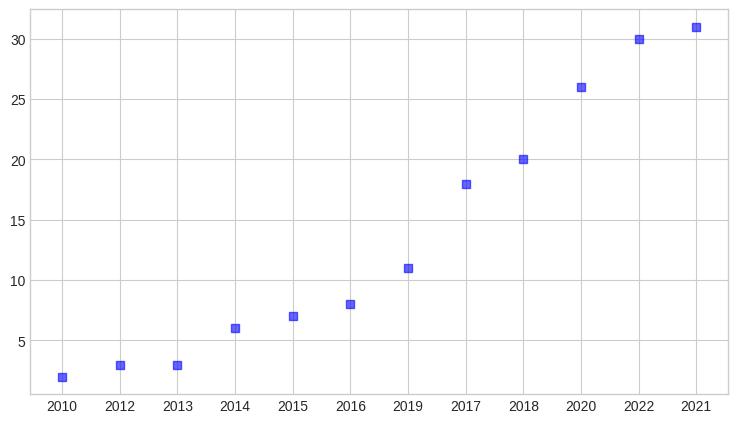

In [ ]:
plt.figure(figsize = (9,5))
# marker = shape of scatter plot 's','*','d','.','^','>','<','o'
# alpha = transperancy of color
plt.scatter(x = satellite_data.index, y = satellite_data.values, color = 'blue', marker = 's', alpha = 0.6)
plt.show()

##### Pie-Chart

In [ ]:
len(falcon_df['Orbit'].unique())

11

In [ ]:
pie_data = falcon_df['Orbit'].value_counts()

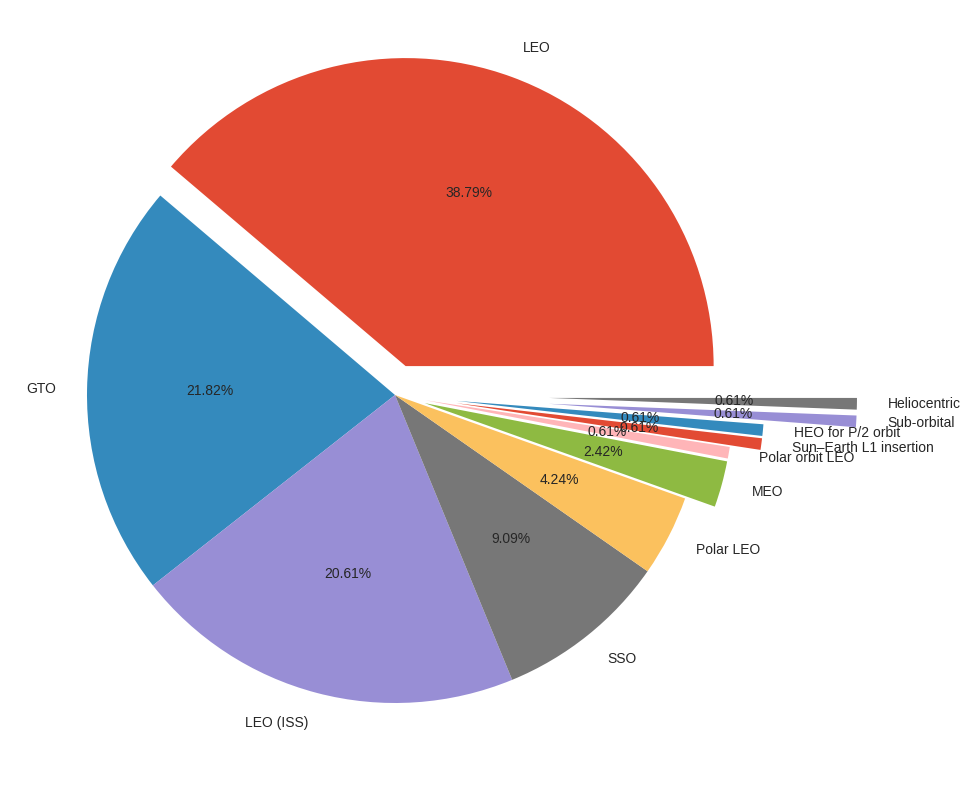

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (10,10))
plt.pie(pie_data.values, labels = pie_data.index, autopct = '%0.2f%%', explode = [0.1,0,0,0,0,0.1,0.1,0.2,0.2,0.5,0.5])
plt.show()

##### Distributional Plot
    * Density and Histogram Plot.

In [ ]:
from skimage import io
from skimage import viewer

In [ ]:
# Read Image Data
pizza_image = io.imread('/content/pizza.jpg')

In [ ]:
pizza_image

In [ ]:
# multidimentional array to 1D array
pizza_image.ravel()

array([220, 226, 238, ..., 234, 233, 239], dtype=uint8)

<Axes: ylabel='Density'>

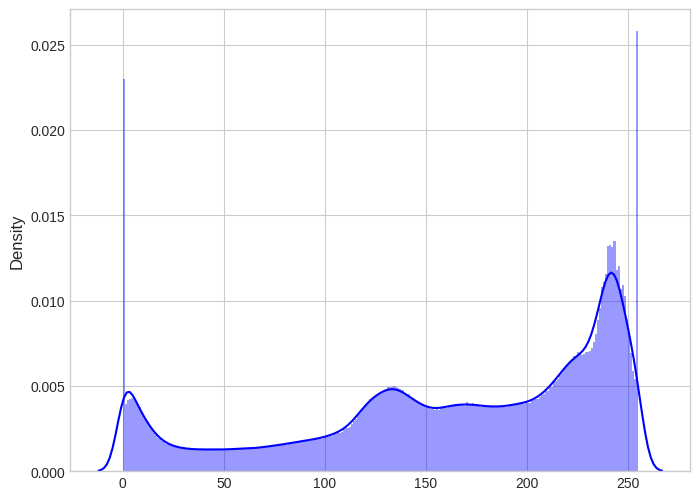

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,6))
# histogram + KDE (kernal density estimator)
sns.distplot(pizza_image.ravel(), bins = 255, color = 'b')

<Axes: ylabel='Density'>

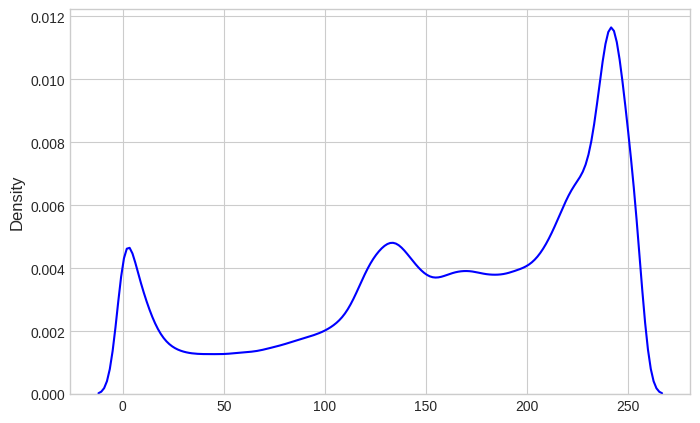

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,5))
sns.distplot(pizza_image.ravel(), bins = 255, color = 'b', hist = False)

##### Boxplot
    * Distribution of continious data
    * It shows 5 point statistical distribution like Quartiles (Q1,Q2,Q3) and 'min' and 'max' limit.
    * Plot will be useful in showing outliers.

<Axes: >

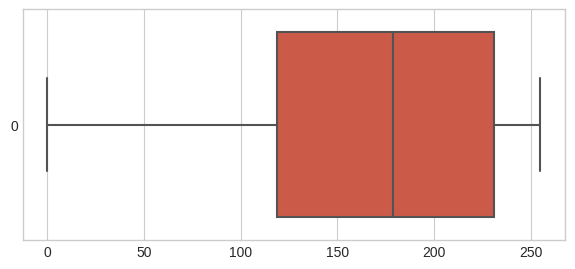

In [ ]:
plt.figure(figsize = (7,3))
sns.boxplot(pizza_image.ravel(), orient = 'h')